In [5]:
import numpy as np
import pandas as pd
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Task 1
bike_india = pd.read_csv("/home/Stoliarchuk/bike_dataset.csv")
print(bike_india.columns)
print(bike_india.shape)

Index(['model_name', 'price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
       'links', 'acceleration_speed', 'top_speed'],
      dtype='object')
(361, 9)


In [3]:
#Task 2
bike_india = bike_india.dropna() 
bike_india.isnull().sum()

model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

In [4]:
#Showing the output
bike_india

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
26,Bajaj CT 110,46413,115.0,104.0,Petrol Bike,117,https://www.carandbike.com/bajaj-bikes/ct-110,3.00,90.0
32,Bajaj Platina 100,52915,102.0,96.9,Petrol Bike,117,https://www.carandbike.com/bajaj-bikes/platina...,3.00,90.0
34,Bajaj CT 100,40794,102.0,89.5,Petrol Bike,114,https://www.carandbike.com/bajaj-bikes/ct-100,3.30,90.0
35,Hero HF Deluxe i3s,59800,97.2,88.5,Petrol Bike,110,https://www.carandbike.com/hero-bikes/hf-delux...,3.60,90.0
36,TVS Star City +,65865,109.7,86.0,Petrol Bike,116,https://www.carandbike.com/tvs-bikes/star-city...,3.20,90.0
...,...,...,...,...,...,...,...,...,...
195,Kawasaki Z250,308000,249.0,26.0,Petrol Bike,168,https://www.carandbike.com/kawasaki-bikes/z250,1.01,200.0
196,Kawasaki Ninja 300,337000,296.0,26.0,Petrol Bike,179,https://www.carandbike.com/kawasaki-bikes/ninj...,2.01,182.0
197,FB Mondial HPS 300,337000,249.0,26.0,Petrol Bike,135,https://www.carandbike.com/fb-mondial-bikes/hp...,3.00,141.0
198,Royal Enfield Interceptor 650,281518,648.0,25.5,Petrol Bike,202,https://www.carandbike.com/royal-enfield-bikes...,1.90,170.0


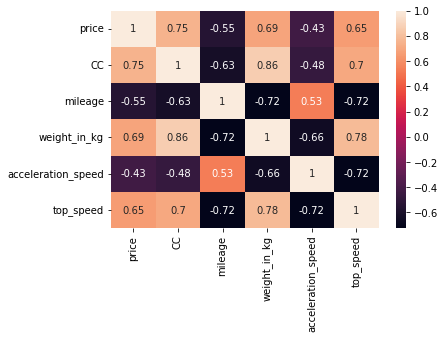

In [7]:
#Task 3
bike_india_only_float  = bike_india.drop(columns=['type_of_bike', 'links'], axis=1).set_index('model_name') 
correlation = bike_india_only_float.corr()
sea.heatmap(correlation, annot=True)
plt.show()

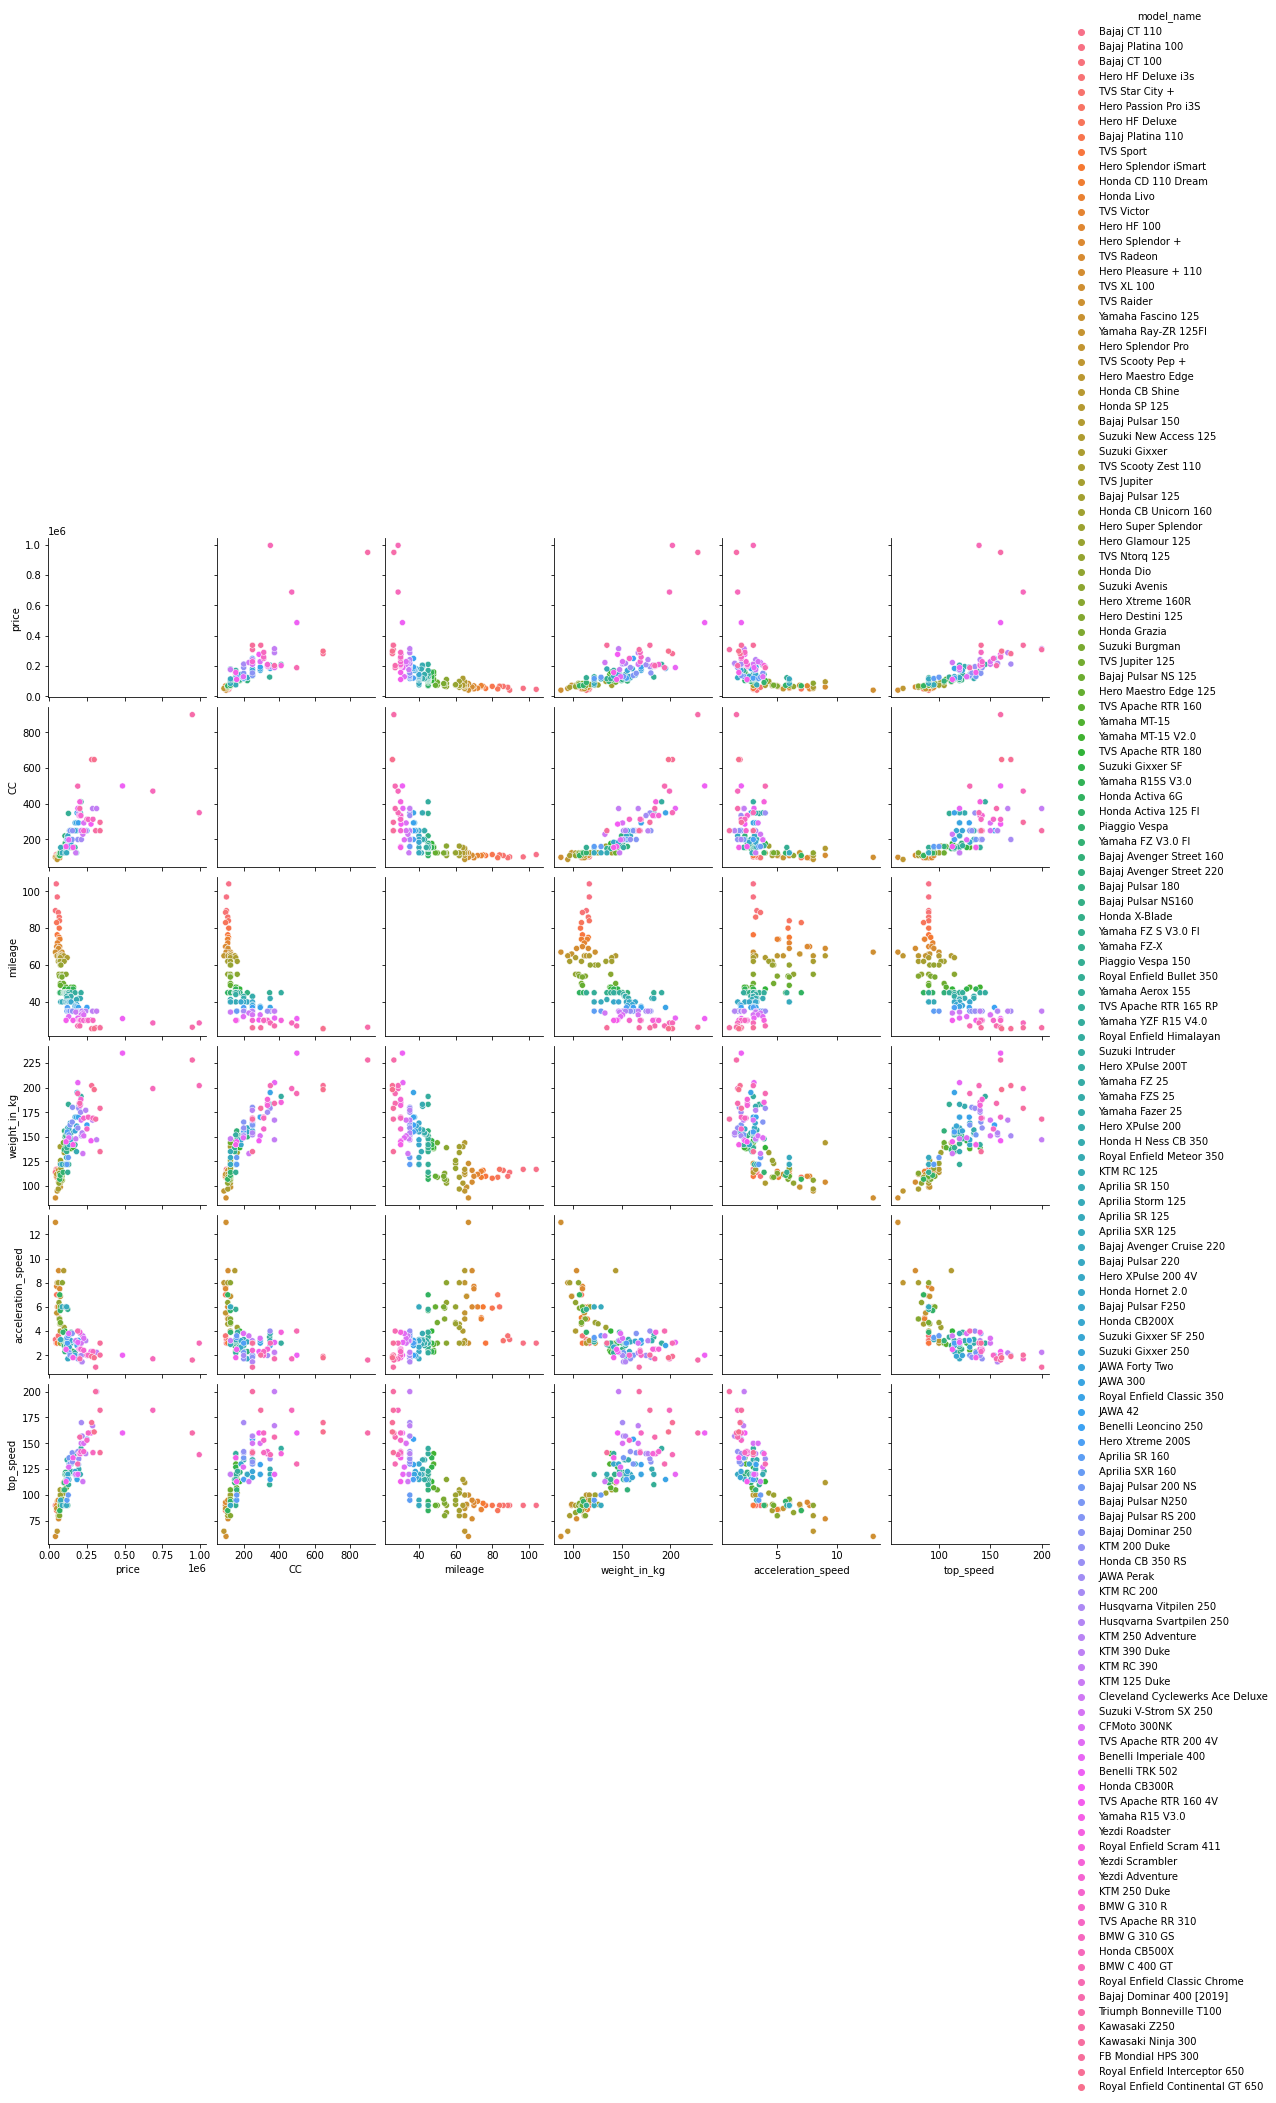

In [9]:
sea.pairplot(bike_india, hue="model_name")


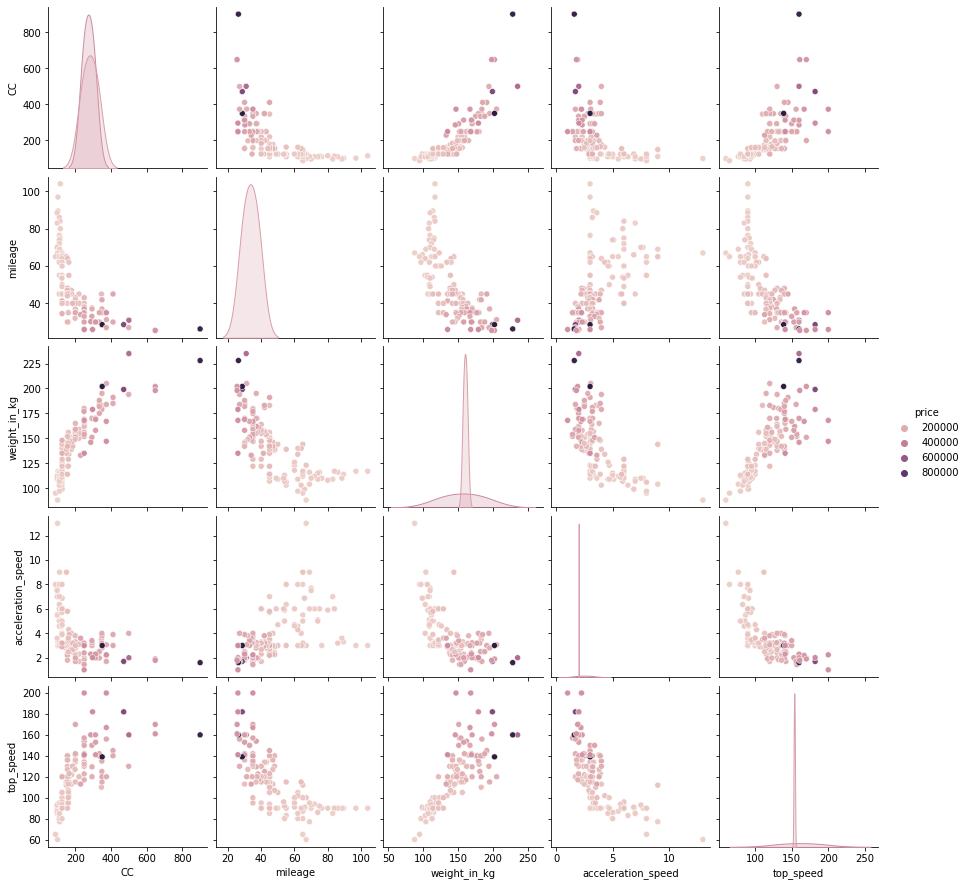

In [11]:
sea.pairplot(bike_india_only_float, hue="price")


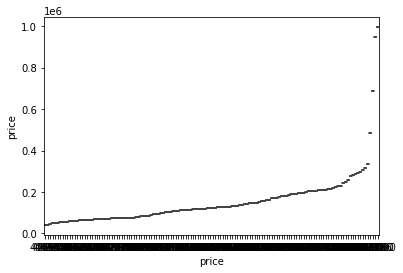

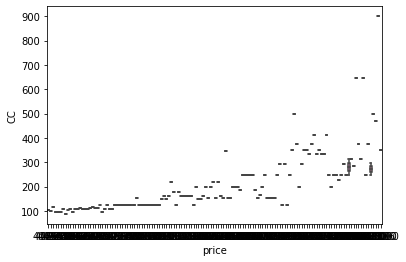

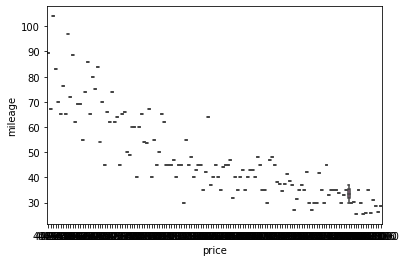

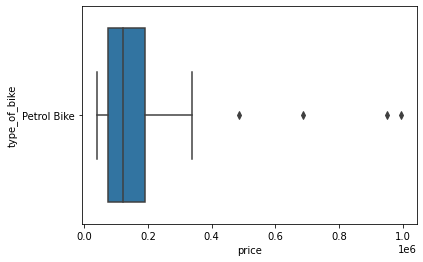

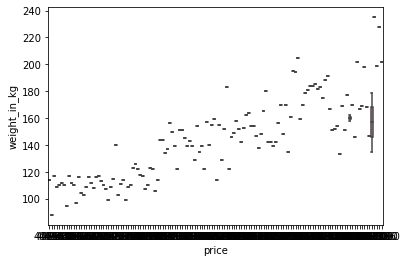

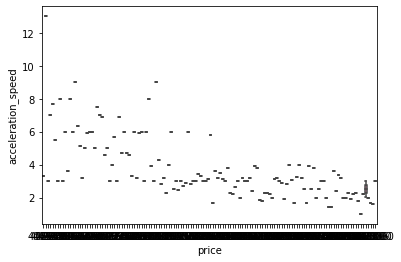

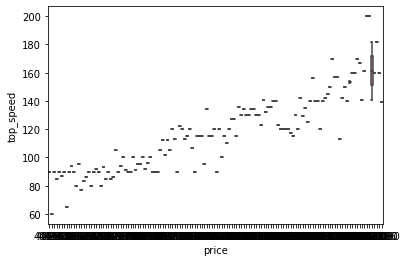

In [12]:
bike_india_new = bike_india.drop(columns=['links'], axis=1).set_index('model_name') 
for i in bike_india_new.columns:
    figure = plt.figure()
    sea.boxplot(data=bike_india_new, x='price', y=bike_india_new[i])

In [31]:
#Task 4
x = bike_india_only_float.drop(['price'], axis=1)
y = bike_india_only_float['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape)
print(y_train.shape)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train)
print(y_train)

(96, 5)
(96,)
[[-4.04924830e-01  1.05017726e-01 -1.75978114e-01 -4.37433855e-01
  -4.13613441e-01]
 [ 2.98630010e-01 -1.34539712e+00  8.51114276e-01 -1.48188706e+00
   2.94119728e+00]
 [-2.65474430e-01  3.90897789e-02 -1.75978114e-01  1.70448960e-01
  -1.97174040e-01]
 [-6.78310641e-01 -4.22405854e-01 -7.78066757e-01  1.27569044e+00
  -1.02685841e+00]
 [-4.42741887e-01  1.15986489e+00 -1.40561135e-01 -3.82171781e-01
  -1.25027573e-01]
 [-8.97334432e-01  1.22579283e+00 -1.13223655e+00  9.99380072e-01
  -1.13507811e+00]
 [ 2.98630010e-01 -2.24622011e-01  3.19859591e-01 -3.82171781e-01
   5.60363864e-01]
 [-3.81289169e-01  1.02800899e+00 -3.53063009e-01  3.36235182e-01
  -5.97586932e-01]
 [-7.89398247e-01  1.48950462e+00 -1.41557238e+00  2.93355267e+00
  -1.49581045e+00]
 [ 2.97054299e-01 -7.52045592e-01  3.55276570e-01 -1.23873393e+00
   1.39004823e+00]
 [-9.05705395e-02 -2.90549959e-01  4.61527507e-01 -2.16385559e-01
   5.60363864e-01]
 [-6.79886351e-01  8.96153097e-01 -9.19734673e-01  

In [32]:
#Task 5 knn
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print(accuracy_score(y_test,knn_predict))
print(classification_report(y_test,knn_predict))
print(confusion_matrix(y_test,knn_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       49400       0.00      0.00      0.00       0.0
       49598       0.00      0.00      0.00       0.0
       52500       0.00      0.00      0.00       1.0
       52915       0.00      0.00      0.00       0.0
       54042       0.00      0.00      0.00       0.0
       59800       0.00      0.00      0.00       0.0
       59925       0.00      0.00      0.00       1.0
       64510       0.00      0.00      0.00       0.0
       65248       0.00      0.00      0.00       1.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       67400       0.00      0.00      0.00       1.0
       69380       0.00      0.00      0.00       1.0
       70000       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/

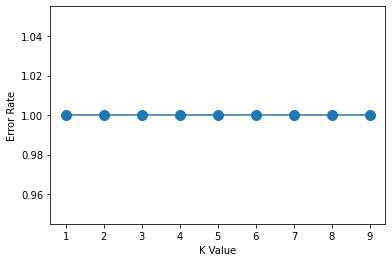

In [33]:
#Task 5, optimal knn
error = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i = knn.predict(x_test)
    error.append(np.mean(predict_i != y_test))
plt.plot(range(1,10), error, marker='o', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

In [34]:
# See that any k is the best
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print(accuracy_score(y_test,knn_predict))
print(classification_report(y_test,knn_predict))
print(confusion_matrix(y_test,knn_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       49598       0.00      0.00      0.00       0.0
       52500       0.00      0.00      0.00       1.0
       52554       0.00      0.00      0.00       0.0
       54042       0.00      0.00      0.00       0.0
       59800       0.00      0.00      0.00       0.0
       59925       0.00      0.00      0.00       1.0
       59942       0.00      0.00      0.00       0.0
       64510       0.00      0.00      0.00       0.0
       65248       0.00      0.00      0.00       1.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       65950       0.00      0.00      0.00       0.0
       67400       0.00      0.00      0.00       1.0
       67990       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/

In [28]:
# Task 5, desicion tree
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(x_train, y_train)
tree_predict = tree.predict(x_test)
print(accuracy_score(y_test,tree_predict))
print(classification_report(y_test, tree_predict))
print(confusion_matrix(y_test, tree_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       49400       0.00      0.00      0.00       0.0
       49598       0.00      0.00      0.00       1.0
       52500       0.00      0.00      0.00       1.0
       52915       0.00      0.00      0.00       0.0
       59925       0.00      0.00      0.00       0.0
       64510       0.00      0.00      0.00       0.0
       65248       0.00      0.00      0.00       1.0
       65865       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       67400       0.00      0.00      0.00       1.0
       69380       0.00      0.00      0.00       0.0
       69645       0.00      0.00      0.00       0.0
       70000       0.00      0.00      0.00       1.0
       70799       0.00      0.00      0.00       1.0
       72600       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/

In [35]:
# Task 5, SVM
svm = SVC(C=1, gamma = 1, kernel = 'rbf')
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
print(accuracy_score(y_test,svm_predict))
print(classification_report(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       52500       0.00      0.00      0.00       1.0
       54042       0.00      0.00      0.00       0.0
       59925       0.00      0.00      0.00       1.0
       64510       0.00      0.00      0.00       0.0
       65248       0.00      0.00      0.00       1.0
       65865       0.00      0.00      0.00       0.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       65950       0.00      0.00      0.00       0.0
       67400       0.00      0.00      0.00       1.0
       67990       0.00      0.00      0.00       0.0
       69380       0.00      0.00      0.00       1.0
       70000       0.00      0.00      0.00       1.0
       70085       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/

In [38]:
#Task 5, optimal SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(x_train,y_train)
grid.best_params_
svm = SVC(C=0.1, gamma = 1, kernel = 'rbf')
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
print(accuracy_score(y_test,svm_predict))
print(classification_report(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       52500       0.00      0.00      0.00       1.0
       59925       0.00      0.00      0.00       1.0
       65248       0.00      0.00      0.00       1.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       67400       0.00      0.00      0.00       1.0
       69380       0.00      0.00      0.00       1.0
       70000       0.00      0.00      0.00       1.0
       72122       0.00      0.00      0.00       1.0
       75733       0.00      0.00      0.00       1.0
      103891       0.00      0.00      0.00       1.0
      108000       0.00      0.00      0.00       1.0
      110086       0.00      0.00      0.00       1.0
      111895       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/

In [39]:
#Task 5, RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
print(accuracy_score(y_test,rf_predict))
print(classification_report(y_test, rf_predict))
print(confusion_matrix(y_test, rf_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       49400       0.00      0.00      0.00       0.0
       49598       0.00      0.00      0.00       0.0
       52500       0.00      0.00      0.00       1.0
       52554       0.00      0.00      0.00       0.0
       52915       0.00      0.00      0.00       0.0
       59925       0.00      0.00      0.00       1.0
       64510       0.00      0.00      0.00       0.0
       65248       0.00      0.00      0.00       1.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       67400       0.00      0.00      0.00       1.0
       67990       0.00      0.00      0.00       0.0
       69380       0.00      0.00      0.00       1.0
       70000       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/

In [40]:
#Task 5, AdaBoost
svc1=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=10, estimator=svc1,learning_rate=1)
model = abc.fit(x_train, y_train)
ada_predict = model.predict(x_test)
print(accuracy_score(y_test,ada_predict))
print(classification_report(y_test, ada_predict))
print(confusion_matrix(y_test, ada_predict))

0.0
              precision    recall  f1-score   support

       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       46413       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       52500       0.00      0.00      0.00       1.0
       59925       0.00      0.00      0.00       1.0
       65248       0.00      0.00      0.00       1.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       67400       0.00      0.00      0.00       1.0
       69380       0.00      0.00      0.00       1.0
       70000       0.00      0.00      0.00       1.0
       72122       0.00      0.00      0.00       1.0
       75733       0.00      0.00      0.00       1.0
      103891       0.00      0.00      0.00       1.0
      103950       0.00      0.00      0.00       0.0
      108000       0.00      0.00      0.00       1.0
      110086       0.00

/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kali/.local/lib/python3.9/site-packages/sklearn/